## Genomics and High-Dimensional Data: Written Analysis, Peer Review and Discussion

### Problem 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import MDS, TSNE
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

#### Data Preparation

In [6]:
# Load the data
dataset = np.load("./data/p2_unsupervised/X.npy")

# Take the log 2 transform of the data
dataset = np.log2(dataset + 1)

# Number of cells (rows) and genes (columns)
n_cells, n_genes = dataset.shape
print(f"Number of cells: {n_cells}")
print(f"Number of genes: {n_genes}")

# Value of the largest entry in the first column of the transformed data
largest_entry_first_col = np.max(dataset[:, 0])
print(f"Largest entry in the first column of the transformed data: {largest_entry_first_col}")

Number of cells: 2169
Number of genes: 45768
Largest entry in the first column of the transformed data: 5.972169178513185


#### 1. Visualization

A scientist tells you that cells in the brain are either excitatory neurons, inhibitory neurons, or non-neuronal cells. Cells from each of these three groups serve different functions within the brain. Within each of these three types, there are numerous distinct sub-types that a cell can be, and sub-types of the same larger class can serve similar functions. Your goal is to produce visualizations which show how the scientist's knowledge reflects in the data.

1. (3 points) Provide at least one visualization which clearly shows the existence of three main brain cell types as described by the scientist, and explain how it shows this. Your visualization should support the idea that cells from a different group (for example, excitatory vs inhibitory) can differ greatly.

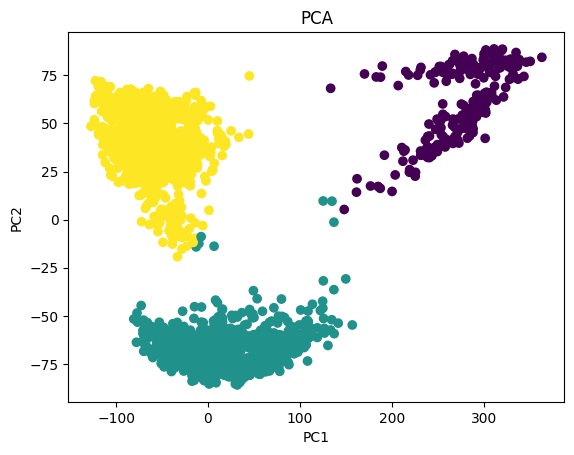

In [22]:
# ===================== PCA ==================== #

# Initialize the PCA, MDS, and t-SNE models
pca = PCA(n_components=2)

# Fit the models to the data
data_pca_fit = pca.fit(dataset)

# Transform the data using the models
data_transform_pca = data_pca_fit.transform(dataset)

# =================== KMEANS =================== #

# Initialize the KMeans model
# (We expect 3 cell types in the data, so we set n_clusters=3)
kmeans = KMeans(n_clusters=3, n_init=10)

# Fit the model to the data
kmeans_fit = kmeans.fit(dataset)

# Predict the cluster labels of the data
kmeans_labels = kmeans_fit.predict(dataset)

# ==================== PLOT ==================== #

# Plot the first two principal components of the PCA transform
plt.scatter(
    data_transform_pca[:, 0],
    data_transform_pca[:, 1],
    c=kmeans_labels,
)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA")
plt.show()

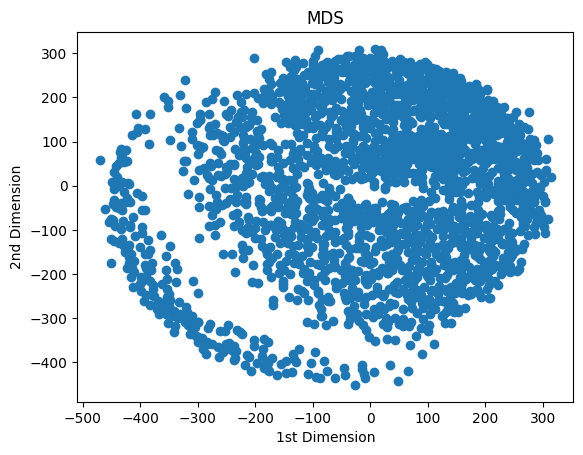

In [30]:
# ==================== MDS ==================== #

# Fit the data using MDS
mds_model = MDS(
    n_components=2,
    normalized_stress="auto",
    eps=1e-5
)
mds_fit = mds_model.fit(dataset)

# ==================== PLOT ==================== #

# Plot the first two principal components of the MDS transform
plt.scatter(
    mds_fit.embedding_[:, 0],
    mds_fit.embedding_[:, 1],
)
plt.xlabel("1st Dimension")
plt.ylabel("2nd Dimension")
plt.title("MDS")
plt.show()

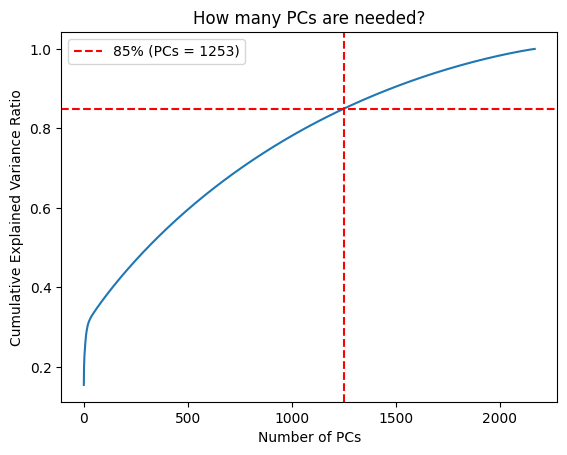

In [27]:
# ===== CUMULATIVE EXPLAINED VARIANCE RATIO ==== #

# Fit the data using PCA without limiting the number of PCs
data_pca_fit = PCA().fit(dataset)

# Get the cumulative explained variance ratio
cumulative_explained_variance_ratio = np.cumsum(data_pca_fit.explained_variance_ratio_)

# Plot the cumulative explained variance ratio
plt.plot(cumulative_explained_variance_ratio)

# Plot a horizontal line at 0.85
plt.axhline(y=0.85, color="r", linestyle="--")

# Get the number of PCs needed to explain 85% of the variance
n_pcs = np.argmax(cumulative_explained_variance_ratio >= 0.85) + 1

# Plot a vertical line at the number of PCs needed to explain 85% of the variance
plt.axvline(
    x=n_pcs, 
    color="r", 
    linestyle="--",
    label=f"85% (PCs = {n_pcs})",
)

# Label the axes
plt.xlabel("Number of PCs")
plt.ylabel("Cumulative Explained Variance Ratio")
plt.title("How many PCs are needed?")
plt.legend()
plt.show()

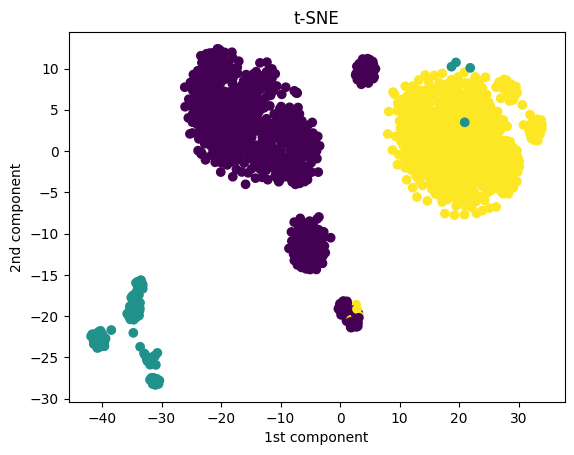

In [29]:
# ==================== TSNE ==================== #

# The dataset has way too many features. We bring them down to the number of 
# PCs needed to explain 85% of the variance using PCA
post_tsne_pca_fit = PCA(n_components=1250).fit(dataset)

# We fit the t-SNE model to the PCA-transformed data
tsne_fit = TSNE(n_components=2).fit(post_tsne_pca_fit.transform(dataset))

# =================== KMEANS =================== #

# Initialize the KMeans model
# (We expect 3 cell types in the data, so we set n_clusters=3)
kmeans_model = KMeans(
    n_clusters=3, 
    n_init=10
)

# Fit the model to the data
kmeans_fit = kmeans_model.fit(post_tsne_pca_fit.transform(dataset))

# Predict the cluster labels of the data
kmeans_labels = kmeans_fit.predict(post_tsne_pca_fit.transform(dataset))

# ==================== PLOT ==================== #

# Plot the first two components of the t-SNE transform
plt.scatter(
    tsne_fit.embedding_[:, 0],
    tsne_fit.embedding_[:, 1],
    c=kmeans_labels,
)
plt.xlabel("1st component")
plt.ylabel("2nd component")
plt.title("t-SNE")
plt.show()
